## Integrantes do grupo:
André Gomes Monteiro - 89168

Leonardo Aranha - 86919

Luara Maria Marino - 89375

Renato Kenji Yamashiro - 88847

# Desempenho do Support Vector Machine utilizando PCA

### Descrição
Em alguns cenários, o cientista de dados se depara com grande quantidade de variáveis e a sua análise pode ser cansativa e  demorada.
O PCA pode ser uma ferramenta poderosa, aumentando a distância entre as variáveis e reduzindo a sua dimensionalidade através das técnicas de autovalores e autovetores da álgebra linear.



##Objetivo
Este notebook tem como objetivo comparar dois modelos utilizando Support Vector Machine (SVM), na qual a primeira não se utiliza o Principal Component Analysis (PCA) e a segunda é utilizado o PCA.

## Importando as bibliotecas

In [167]:
# Imports para análise dos dados
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
# Imports para ML
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
# Imports para exportar os dados
from google.colab import files

In [129]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv") 

In [130]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Mid Price
1,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Mid Price
2,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,Mid Price
3,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,High Price
4,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,Mid Price


In [131]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1148 non-null   int64  
 1   MSSubClass     1148 non-null   int64  
 2   MSZoning       1148 non-null   object 
 3   LotFrontage    956 non-null    float64
 4   LotArea        1148 non-null   int64  
 5   Street         1148 non-null   object 
 6   Alley          85 non-null     object 
 7   LotShape       1148 non-null   object 
 8   LandContour    1148 non-null   object 
 9   Utilities      1148 non-null   object 
 10  LotConfig      1148 non-null   object 
 11  LandSlope      1148 non-null   object 
 12  Neighborhood   1148 non-null   object 
 13  Condition1     1148 non-null   object 
 14  Condition2     1148 non-null   object 
 15  BldgType       1148 non-null   object 
 16  HouseStyle     1148 non-null   object 
 17  OverallQual    1148 non-null   int64  
 18  OverallC

In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Data Visualization

In [134]:
train1 = train.fillna(0) #Copiando os dataframe para a manipulação e visualização dos dados

O gráfico abaixo mostra a relação entre a área total do imóvel e a área total da garagem. Podemos observar que quanto maior o tamanho da área da garagem, maior o preço do imóvel. Existem imóveis que não possuem garagem e a faixa de preço está entre baixo e médio.

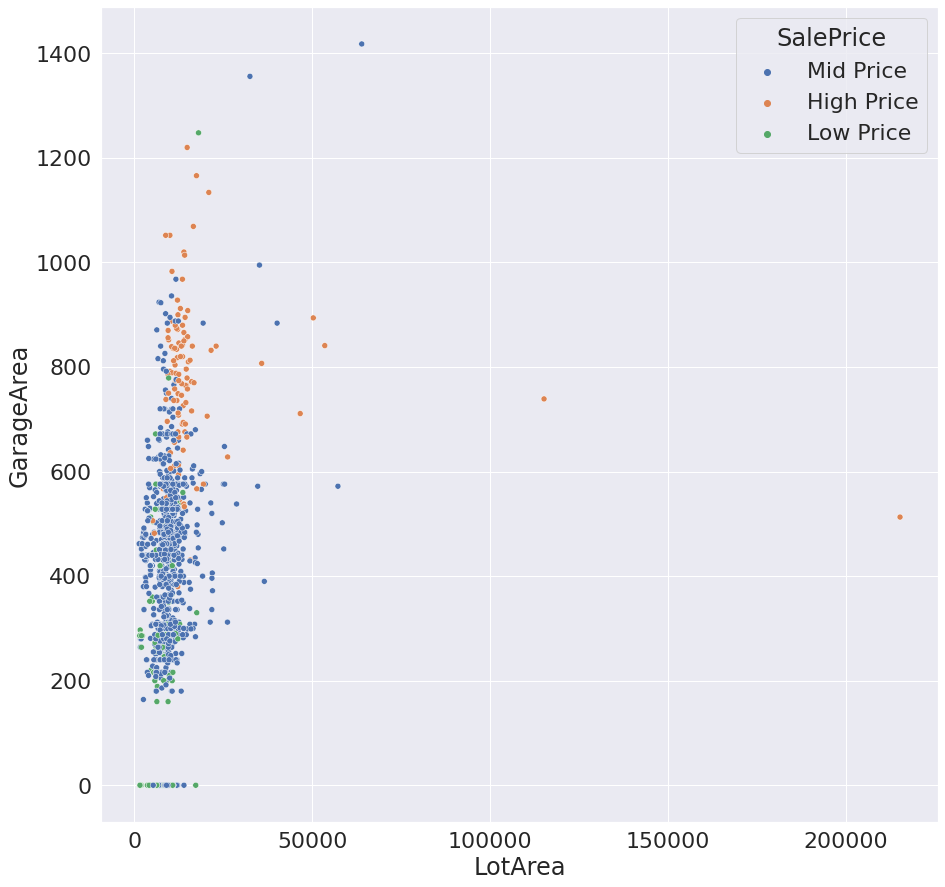

In [136]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=train1, x="LotArea", y="GarageArea", hue="SalePrice")

O gráfico abaixo mostra a relação entre a área total do imóvel com a área do primeiro andar. Como podemos observar, quanto maior a área do primeiro andar, maior o valor do imóvel.

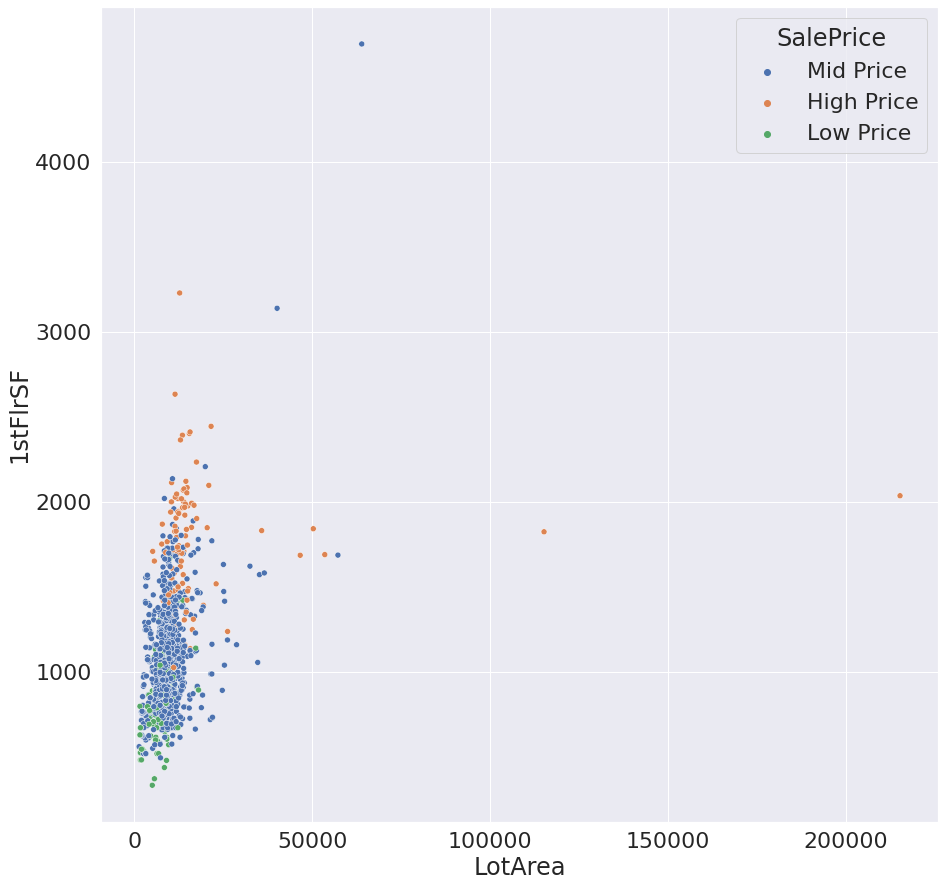

In [137]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=train1, x="LotArea", y="1stFlrSF", hue="SalePrice")

O gráfico abaixo mostra a relação entre a área do primeiro andar e a área do segundo andar. Comparado aos gráficos anteriores, fica mais claro a dispersão entre os pontos e a tendência do aumento dos valores dos imóveis quando os valores das respectivas áreas aumentam. 

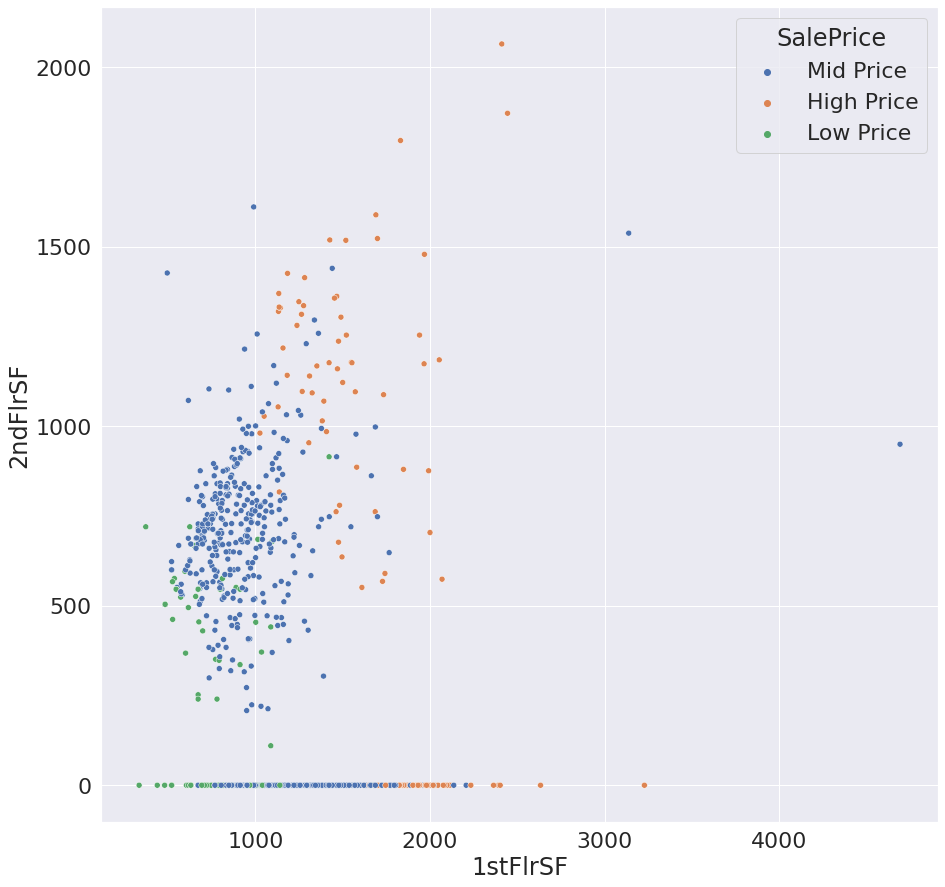

In [138]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=train1, x="1stFlrSF", y="2ndFlrSF", hue="SalePrice")

In [139]:
le = preprocessing.LabelEncoder() # Transformando todas as colunas em valores númericos

for col in train1.columns[train1.dtypes == object]:
  train1[col] = le.fit_transform(train1[col].astype(str))

In [140]:
train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2,20,3,80.0,9600,1,0,3,3,0,...,0,0,0,0,0,5,2007,8,4,2
1,4,70,3,60.0,9550,1,0,0,3,0,...,0,0,0,0,0,2,2006,8,0,2
2,6,50,3,85.0,14115,1,0,0,3,0,...,0,0,3,3,700,10,2009,8,4,2
3,7,20,3,75.0,10084,1,0,3,3,0,...,0,0,0,0,0,8,2007,8,4,0
4,8,60,3,0.0,10382,1,0,0,3,0,...,0,0,0,3,350,11,2009,8,4,2


Como podemos observar o gráfico de correlação abaixo, devido a dimensão do dataset é difícil a verificação da correlação entre as variáveis.

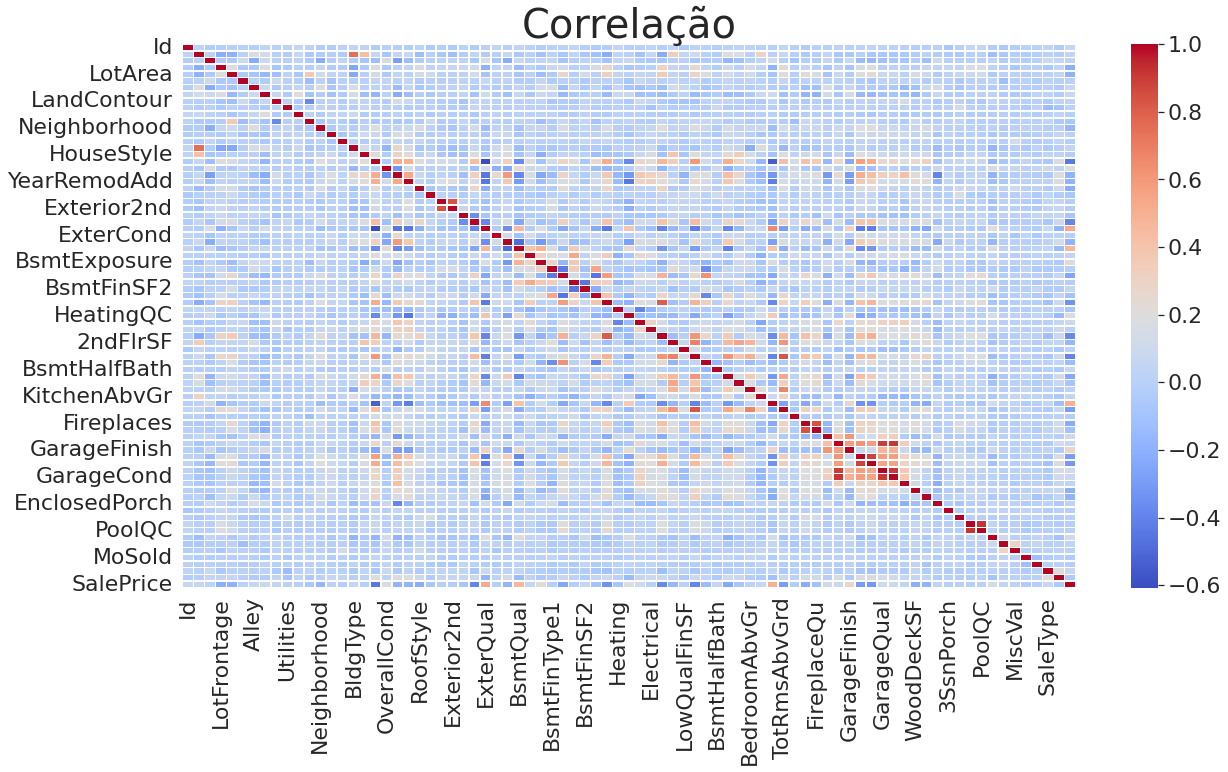

In [141]:
corr = train1.corr() #criando gráfico de correlação
sns.set(font_scale=2.0)
plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap = "coolwarm", linewidth = .5, linecolor = "white")
plt.title("Correlação", fontsize = 40)
plt.show()

O gráfico abaixo mostra a distribuição das features, podemos observar que exitem mais casas com preço médio em relação aos de preço baixo e alto.

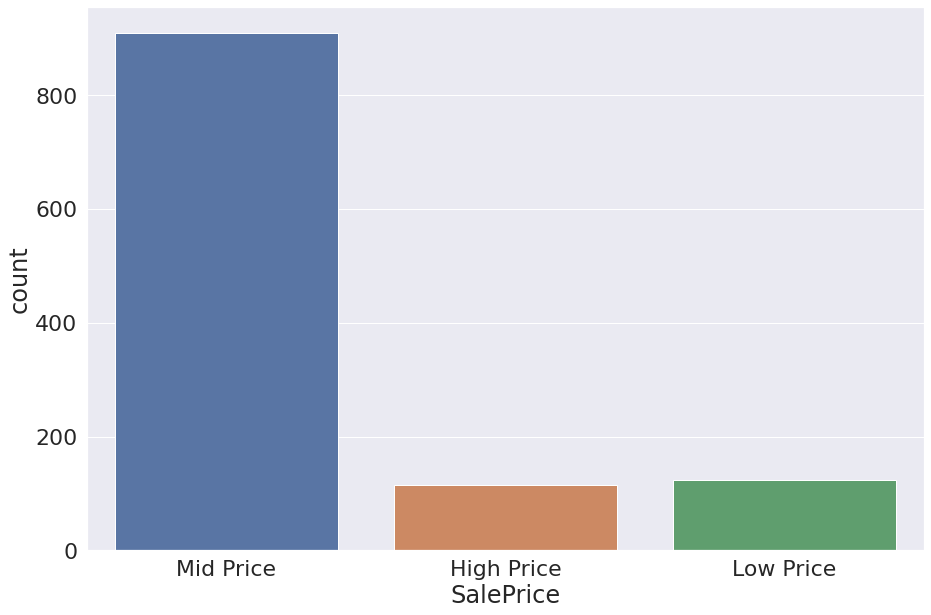

In [142]:
fig = plt.figure(figsize = (15, 10)) #criar gráfico de distribuição do label
sns.countplot(x='SalePrice', data=train)

## Criando Modelo SVM sem PCA
O modelo abaixo possui o seguinte pipeline:

1 - Smote solucionando o desbalanceamento dos dados

2 - Standard Scaler para normalização 

3 - Support Vector Machine para múltiplas classes

In [144]:
X = train.drop(['SalePrice'], axis = 1)
y = train['SalePrice']

In [148]:
X = X.fillna(0) # Tratando NaN

In [149]:
for col in X.columns[X.dtypes == object]:
  X[col] = le.fit_transform(X[col].astype(str)) #Trasnformando string em numéricos

In [150]:
scaler = StandardScaler() #normalizador
smt = SMOTE(random_state=42) #smote
clf = svm.SVC(decision_function_shape='ovo') # Classificador com multiplas classes
pipeline = Pipeline([ ('smt', smt), ('scaler', scaler),  ('clf', clf)])
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.30, random_state=42)
pipeline.fit(X_train, y_train) 

Pipeline(steps=[('smt', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('clf', SVC(decision_function_shape='ovo'))])

In [151]:
y_pred = pipeline.predict(X_test)

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  High Price       1.00      0.82      0.90        38
   Low Price       0.66      0.61      0.63        41
   Mid Price       0.92      0.95      0.93       266

    accuracy                           0.90       345
   macro avg       0.86      0.79      0.82       345
weighted avg       0.90      0.90      0.89       345



O modelo teve dificuldade para classificar casas com preços baixos.

# Modelo SVM utilizando PCA

O pipeline possui os seguintes passos:

1 - Smote 

2 - Standard Scaler

3 - PCA com 20 componetes

4 - SVM para múltiplas classes

In [155]:
pca = PCA(n_components=20) #PCA com 20 componentes
scaler = StandardScaler() #Normalizador
smt = SMOTE(random_state=42)# Desbalancemanto dos dados
clf = svm.SVC(decision_function_shape='ovo') #ML para multiclasses
pipeline = Pipeline([('smt', smt), ('scaler', scaler), ('pca', pca),   ('clf', clf)])
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.30, random_state=42)
pipeline.fit(X_train, y_train) 

Pipeline(steps=[('smt', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=20)),
                ('clf', SVC(decision_function_shape='ovo'))])

In [156]:
y_pred = pipeline.predict(X_test)

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  High Price       0.94      0.89      0.92        38
   Low Price       0.60      0.78      0.68        41
   Mid Price       0.95      0.91      0.93       266

    accuracy                           0.90       345
   macro avg       0.83      0.86      0.84       345
weighted avg       0.91      0.90      0.90       345



Como podemos observar, utilizandoo PCA, o modelo obteve uma leve otimização nas métricas recall e f1-score para Low Price.

# Entendo PCA

Utilizando 20 componentes principais, a sua representatividade foi equivalente a 67% dos dados totais, apesar de sacrificar as métricas, o resutado final foi próximo ao do modelo sem PCA, porém em termos de dimensionalidade, reduzimos para 25% dos dados totais.

In [92]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_)) # Porcentagem de representativdade para cada componente

Explained variation per principal component: [0.19419107 0.05785365 0.04834003 0.03908963 0.03686538 0.03327918
 0.02644117 0.02490575 0.02282567 0.02064955 0.0204195  0.01982263
 0.01804831 0.01735379 0.01644109 0.01618885 0.01574203 0.01439717
 0.01426936 0.0138078 ]


In [91]:
pca.explained_variance_ratio_.sum() #Representatividade total

0.6709316077136923

O gráfico abaixo mostra a representatividade para cada componentes principais, onde o maior valor é para a principal component0 comm 19% de explacabilidade.

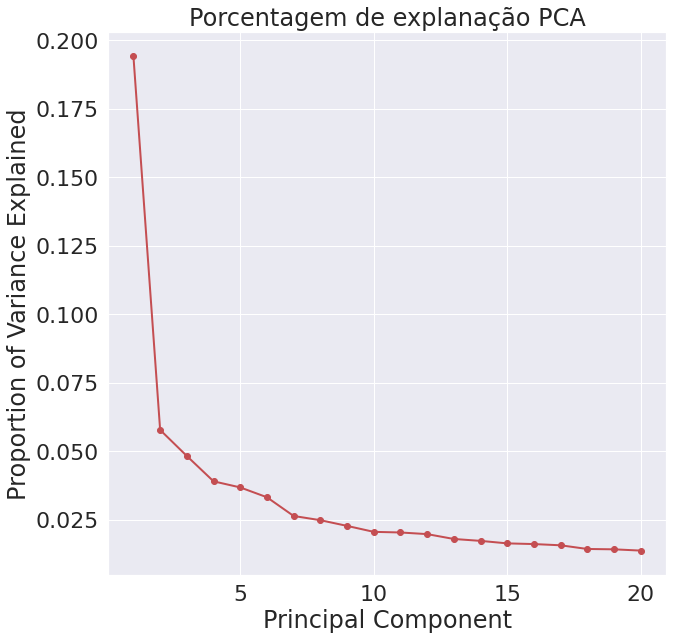

In [93]:
plt.figure(figsize=(10,10))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Porcentagem de explanação PCA')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [176]:
x = StandardScaler().fit_transform(X_test) # Criando dataset com n componentes igual a 2 para visualização

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component'+str(i) for i in range(2)])

In [177]:
principal['SalePrice'] = y_pred

In [178]:
principal

,principal component0,principal component1,SalePrice
0,-3.568114,2.829294,Low Price
1,0.621639,-2.670668,Mid Price
2,-2.356864,-1.802718,Mid Price
3,-2.472916,-0.923085,Low Price
4,1.108317,1.705382,Mid Price
...,...,...,...
340,2.058533,1.949885,Mid Price
341,-1.336676,2.207799,Mid Price
342,-1.009175,-1.166328,Mid Price
343,-1.276774,-3.290346,Mid Price


Abaixo um gráfico com 2 componentes principais para a visualização do cluster. Podemos visualizar que o modelo teve dificuldade em separar as casas de valores médios e baixos.

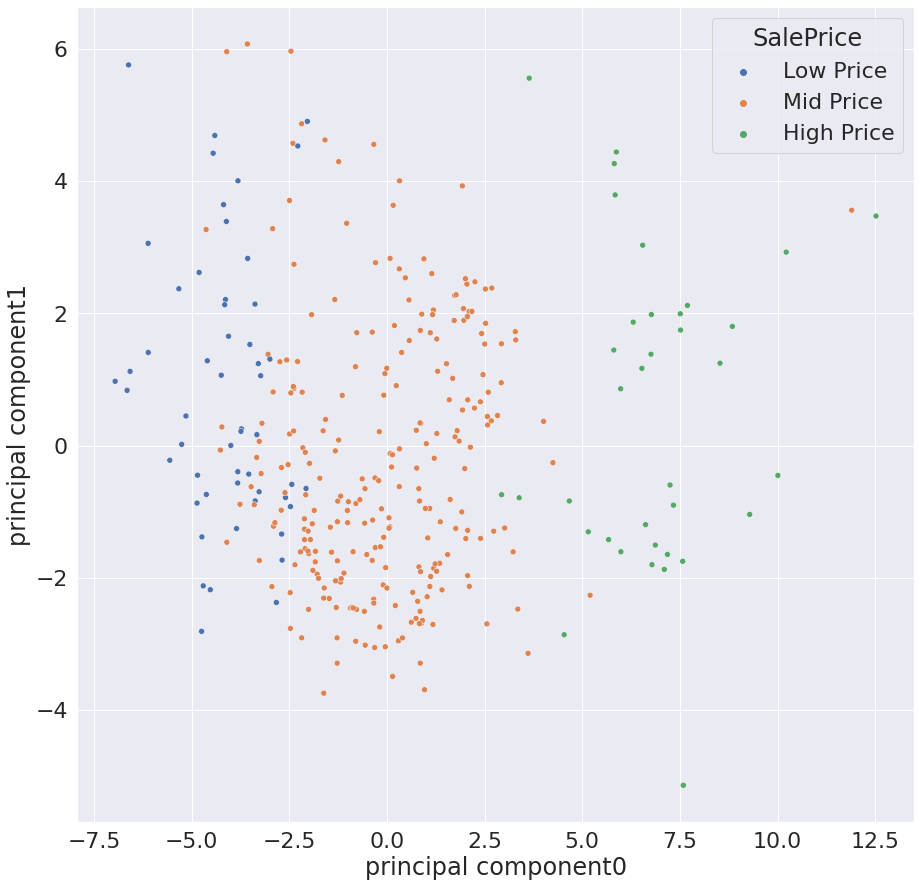

In [179]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=principal, x="principal component0", y="principal component1", hue="SalePrice")

# Prevendo os dados test com o modelo SVM com PCA

Como o modelo trabalha com dados numéricos, é necessário a conversão dos strings para numéricos.

In [159]:
test1 = test.fillna(0) # tratando NaN

In [160]:
for col in test1.columns[test1.dtypes == object]: # transformando em numéricos
  test1[col] = le.fit_transform(test1[col].astype(str))

In [162]:
test['SalePrice'] = pipeline.predict(test1) # predição

In [163]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,Mid Price
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,Mid Price
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,Mid Price
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,Mid Price
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,Mid Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,Mid Price
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,Mid Price
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,Mid Price
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,Mid Price


#Conclusão

O gráfico abaixo mostra a distribuição das previsões com os dados novos.
Como podemos observar, o modelo considerou que todas as casas são de preço médio, o que mostrou sinal de overfitting.

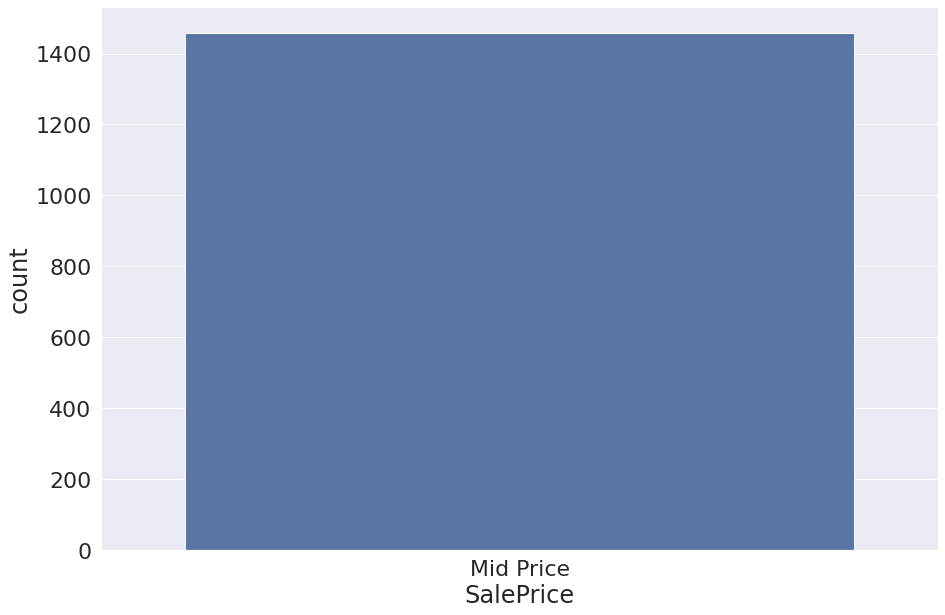

In [164]:
fig = plt.figure(figsize = (15, 10)) #criar gráfico de distribuição de variáveis resposta
sns.countplot(x='SalePrice', data=test)

In [165]:
out = test[["Id", "SalePrice"]] # Separando as colunas Id e SalePrice

In [166]:
out # Visualização do DataFrame

,Id,SalePrice
0,1461,Mid Price
1,1462,Mid Price
2,1463,Mid Price
3,1464,Mid Price
4,1465,Mid Price
...,...,...
1454,2915,Mid Price
1455,2916,Mid Price
1456,2917,Mid Price
1457,2918,Mid Price


In [169]:
out.to_csv('out.csv') # transformando para arquivo csv
files.download("out.csv") # Download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>